<a href="https://colab.research.google.com/github/Antony-gitau/machine_learning_playground/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reproducing the lab 2 exercise of the MIT deeplearning course 2023.

building a CNN with MNIST dataset.

In [2]:
%tensorflow_version 2.x
import tensorflow as tf

!pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.3.0-py3-none-any.whl size=2117301 sha256=ed30db6a2053b742f17a899757d23e3be572aa54610b348206f51a7c4e67cfeb
  Stored in directory: /root/.cache/pip/wheels/9c/9f/b5/0e31f83bc60a83625e37429f923934e26802d0d68cf3ef3216
Successfully built mitdeeplearning


In [3]:
mnist = tf.keras.datasets.mnist

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
#tuple unpacking to assign the train and test sets from the mnist dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
print("training images: ", len(train_images))
print("testing images: ", len(test_images))

training images:  60000
testing images:  10000


we are adding an extra dimension to the training set so that we pass them through the model as (sample, height, width, channels).

In [6]:
# i rename train_image2 so that i can compare with the train_image before normalization addition of an extra dimension
train_images2 = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels2 = (train_labels).astype(np.int64)
test_images2 = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels2 = (test_labels).astype(np.int64)

visualize the digits in a grid format
- creat the figure size
- take a random index of 36 numbers from the 60k training examples. because the grid is 6 * 6
- create plots for all the 36 randomly selected digits.
- remove x and y ticks
- then plot the images

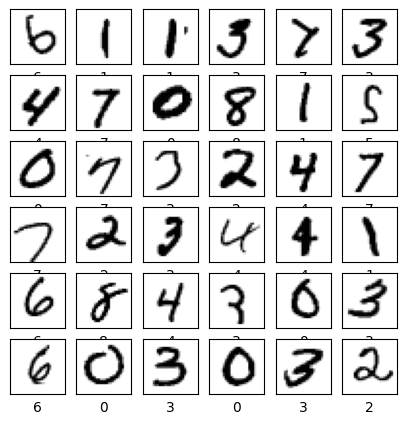

In [7]:
plt.figure(figsize=(5,5))
random_inds = np.random.choice(60000, 36)
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  image_ind = random_inds[i]
  plt.imshow(np.squeeze(train_images2[image_ind]), cmap=plt.cm.binary)
  plt.xlabel(train_labels2[image_ind])


In [8]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(9,activation=tf.nn.softmax)
  ])
  return fc_model
model = build_fc_model()


In [9]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
BATCH_SIZE = 64
EPOCHS = 5

model.fit(train_images2, train_labels2, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.0988
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: nan - accuracy: 0.0987
Epoch 3/5
938/938 [==============================] - 4s 5ms/step - loss: nan - accuracy: 0.0987
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: nan - accuracy: 0.0987
Epoch 5/5
938/938 [==============================] - 6s 7ms/step - loss: nan - accuracy: 0.0987


In [11]:
test_loss, test_acc = model.evaluate(test_images2, test_labels2)

313/313 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0980


In [13]:
test_acc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.09799999743700027

![alt_text](https://raw.githubusercontent.com/aamini/introtodeeplearning/master/lab2/img/convnet_fig.png "CNN Architecture for MNIST Classification")

## we build this cnn